# **About Spotify**

Social media to use: **Spotify**

*   *Background:*

  Spotify is a music streaming platform that allows users to listen to millions of songs across various genres. Users can create playlists, follow artists, and discover new music. Spotify also provides an API that enables developers to access data about music, artists, and users, allowing for detailed analysis.
  



*   *What can be done with the Spotify API?*

1. Manage and retrieve playlists.
2. Access basic data about user profiles.
3. Get information about the top tracks and artists a user listens to.
4. Detect similar artists and popular genres.
5. Obtain data on followers and artist popularity.

    And more...





**Spotify API:**
* Spotify Web API: Allows access to data such as playlists, tracks, artists, and user profiles. Developers can use it to create applications that interact with Spotify’s music and user data.

* OAuth 2.0: The authorization protocol used for secure access to user data.

**Limitations:**
- *Spotify API Restrictions:*
    - Access to personal and sensitive user data is restricted.
    - The API may have rate limits for requests.
    - Modifying user data is limited.


**Libraries:**
- requests: To make HTTP requests and
access the Spotify API.
- networkx: For creating and analyzing social networks.
- matplotlib or plotly: For data visualization.

## 1.- **Acess to the data**

### 1.1 **Create an app to get a token**

Create an app in Spotify for Developers to get API credentials

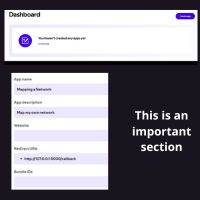

### 1.2 **Get the token**

We used OAuth 2.0 to authenticate our access to the API. Remember to have the client credentials

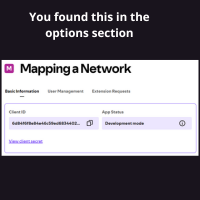

#### Option 1 to get the token


Using the redirect link



```
from flask import Flask, request, redirect
import requests
import json

app = Flask(__name__)

CLIENT_ID = '6d84f6f8e84e46c59ed68344021e2ba9'
CLIENT_SECRET = '9b629cadac6f4c8bb956d0eaf82b3f8b'
REDIRECT_URI = 'http://127.0.0.1:5000/callback'

@app.route('/')
def home():
    auth_url = (
        'https://accounts.spotify.com/authorize'
        '?client_id=' + CLIENT_ID +
        '&response_type=code'
        '&redirect_uri=' + REDIRECT_URI +
        '&scope=user-read-private user-read-email user-top-read user-follow-read'
    )
    return redirect(auth_url)

@app.route('/callback')
def callback():
    code = request.args.get('code')
    token_url = 'https://accounts.spotify.com/api/token'
    headers = {'Content-Type': 'application/x-www-form-urlencoded'}
    data = {
        'grant_type': 'authorization_code',
        'code': code,
        'redirect_uri': REDIRECT_URI,
        'client_id': CLIENT_ID,
        'client_secret': CLIENT_SECRET
    }
    response = requests.post(token_url, headers=headers, data=data)
    response_data = response.json()
    access_token = response_data.get('access_token')

    return f'Access Token: {access_token}'

if __name__ == '__main__':
    app.run(debug=True, port=5000)
```



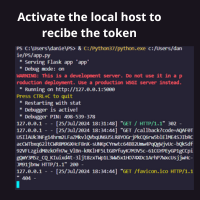



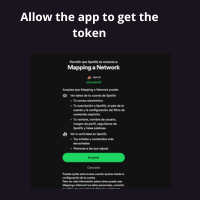

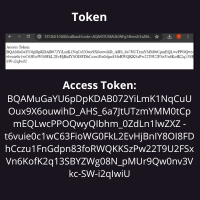

#### Option 2 to get the token

In [ ]:
import requests

#Client credentials
CLIENT_ID = '6d84f6f8e84e46c59ed68344021e2ba9'
CLIENT_SECRET = '9b629cadac6f4c8bb956d0eaf82b3f8b'

AUTH_URL = 'https://accounts.spotify.com/api/token'

auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
})

auth_response_data = auth_response.json()
access_token = auth_response_data['access_token']
headers = {
    'Authorization': f'Bearer {access_token}'
}


### 1.3 **Get the data**

Profile data

In [ ]:
access_token = 'BQDajQ9bLHgUkHfg_WZ2AXOkvdU8vseMJg-4Lcb43lZSIF6io39FobkrjjUTs0E9PjDIcTPm9IfCmkbHfMNjpi6Iv4C3rfEWTLp2iLj2yuX0D8JOLim-f-qZug_5NiEMFwQzaQ76X-s6N8OhkBHtnY5-rFzdXx5sAwInOX08nwTfRC_AqKRQJqv8EZB68k6sUnGIy32EQH1V-lCXHGc'

In [ ]:
import requests
import pandas as pd

def get_current_user_profile(access_token):
    url = 'https://api.spotify.com/v1/me'
    headers = {'Authorization': f'Bearer {access_token}'}
    response = requests.get(url, headers=headers)
    return response.json()

user_profile = get_current_user_profile(access_token)

#DF para que se vea mas bonito
user_profile_df = pd.DataFrame([user_profile])
print(user_profile_df)


  display_name                                      external_urls  \
0       cyn.vo  {'spotify': 'https://open.spotify.com/user/cyn...   

                                           href           id  \
0  https://api.spotify.com/v1/users/cynthiaovac  cynthiaovac   

                                              images  type  \
0  [{'url': 'https://i.scdn.co/image/ab6775700000...  user   

                        uri                    followers country  product  \
0  spotify:user:cynthiaovac  {'href': None, 'total': 13}      MX  premium   

                                    explicit_content                  email  
0  {'filter_enabled': False, 'filter_locked': False}  cynthiaovac@gmail.com  


Getting **Top Artists and Genres**
To get the user's favorite genres and artists, we used the `</me/top/artists>` and `</me/top/tracks>` endpoints.

In [ ]:
import requests
import pandas as pd

def get_current_user_profile(access_token):
    url = 'https://api.spotify.com/v1/me'
    headers = {'Authorization': f'Bearer {access_token}'}
    response = requests.get(url, headers=headers)
    return response.json()

def get_followed_artists(access_token, limit=20):
    url = f'https://api.spotify.com/v1/me/following?type=artist&limit={limit}'
    headers = {'Authorization': f'Bearer {access_token}'}
    response = requests.get(url, headers=headers)
    return response.json()

#access_token = 'BQDajQ9bLHgUkHfg_WZ2AXOkvdU8vseMJg-4Lcb43lZSIF6io39FobkrjjUTs0E9PjDIcTPm9IfCmkbHfMNjpi6Iv4C3rfEWTLp2iLj2yuX0D8JOLim-f-qZug_5NiEMFwQzaQ76X-s6N8OhkBHtnY5-rFzdXx5sAwInOX08nwTfRC_AqKRQJqv8EZB68k6sUnGIy32EQH1V-lCXHGc'
user_profile = get_current_user_profile(access_token)

#Followed artist
followed_artists = get_followed_artists(access_token)

# Creat a dictionary for each artist
artists_data = []
for artist in followed_artists['artists']['items']:
    artist_info = {
        'name': artist['name'],
        'spotify_url': artist['external_urls']['spotify'],
        'followers': artist['followers']['total'],
        'genres': ", ".join(artist['genres']),
        'image_url': artist['images'][0]['url'] if artist['images'] else None,
        'popularity': artist['popularity']
    }
    artists_data.append(artist_info)

#df to get in a clear way
artists_df = pd.DataFrame(artists_data)
print(artists_df)

#save in a csv
artists_df.to_csv('followed_artists.csv', index=False)


               name                                        spotify_url  \
0      Lana Del Rey  https://open.spotify.com/artist/00FQb4jTyendYW...   
1      Taylor Swift  https://open.spotify.com/artist/06HL4z0CvFAxyc...   
2   Cartel De Santa  https://open.spotify.com/artist/07PdYoE4jVRF6U...   
3      Selena Gomez  https://open.spotify.com/artist/0C8ZW7ezQVs4UR...   
4        Bruno Mars  https://open.spotify.com/artist/0du5cEVh5yTK9Q...   
5       Nicki Minaj  https://open.spotify.com/artist/0hCNtLu0Jehylg...   
6            Sabino  https://open.spotify.com/artist/0zgFL90nGTrH2i...   
7          Chayanne  https://open.spotify.com/artist/1JbemQ1fPt2YmS...   
8    Olivia Rodrigo  https://open.spotify.com/artist/1McMsnEElThX1k...   
9   Marcos Menchaca  https://open.spotify.com/artist/1Pvcsw46EYSQKI...   
10            Humbe  https://open.spotify.com/artist/1b7AEdUSudOQoZ...   
11             Duki  https://open.spotify.com/artist/1bAftSH8umNcGZ...   
12         Aventura  https://open.spot

In [ ]:
#functions to get my top tracks and artists
def get_top_artists(access_token, time_range='medium_term', limit=20):
    url = f'https://api.spotify.com/v1/me/top/artists?time_range={time_range}&limit={limit}'
    headers = {'Authorization': f'Bearer {access_token}'}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}")
        return None

def get_top_tracks(access_token, time_range='medium_term', limit=20):
    url = f'https://api.spotify.com/v1/me/top/tracks?time_range={time_range}&limit={limit}'
    headers = {'Authorization': f'Bearer {access_token}'}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}")
        return None

In [ ]:
#Main Artists
top_artists = get_top_artists(access_token)
if top_artists and 'items' in top_artists:
    artists_data = []
    for artist in top_artists['items']:
        artist_info = {
            'name': artist['name'],
            'spotify_url': artist['external_urls']['spotify'],
            'followers': artist['followers']['total'],
            'genres': ", ".join(artist['genres']),
            'image_url': artist['images'][0]['url'] if artist['images'] else None,
            'popularity': artist['popularity']
        }
        artists_data.append(artist_info)

    artists_df = pd.DataFrame(artists_data)
    print(artists_df)
    artists_df.to_csv('top_artists.csv', index=False)

# Main tracks
top_tracks = get_top_tracks(access_token)
if top_tracks and 'items' in top_tracks:
    tracks_data = []
    for track in top_tracks['items']:
        track_info = {
            'name': track['name'],
            'artist': ", ".join([artist['name'] for artist in track['artists']]),
            'album': track['album']['name'],
            'spotify_url': track['external_urls']['spotify'],
            'popularity': track['popularity']
        }
        tracks_data.append(track_info)

    tracks_df = pd.DataFrame(tracks_data)
    print(tracks_df)
    tracks_df.to_csv('top_tracks.csv', index=False)


                   name                                        spotify_url  \
0          Juan Gabriel  https://open.spotify.com/artist/2MRBDr0crHWE5J...   
1          Taylor Swift  https://open.spotify.com/artist/06HL4z0CvFAxyc...   
2               KAROL G  https://open.spotify.com/artist/790FomKkXshlbR...   
3              Don Omar  https://open.spotify.com/artist/33ScadVnbm2X8k...   
4      Peder B. Helland  https://open.spotify.com/artist/5zQsBMuxuacTrh...   
5       Cartel De Santa  https://open.spotify.com/artist/07PdYoE4jVRF6U...   
6         Fuerza Regida  https://open.spotify.com/artist/0ys2OFYzWYB5hR...   
7              Chayanne  https://open.spotify.com/artist/1JbemQ1fPt2YmS...   
8                  Feid  https://open.spotify.com/artist/2LRoIwlKmHjgvi...   
9             Bad Bunny  https://open.spotify.com/artist/4q3ewBCX7sLwd2...   
10         Lana Del Rey  https://open.spotify.com/artist/00FQb4jTyendYW...   
11  Alejandro Fernández  https://open.spotify.com/artist/6sq1yF0

Getting **Related Artists and Their Genres**
For each top artist, we will fetch related artists using the `/artists/{id}/related-artists` endpoint.


In [ ]:
def get_related_artists(access_token, artist_id):
    url = f'https://api.spotify.com/v1/artists/{artist_id}/related-artists'
    headers = {'Authorization': f'Bearer {access_token}'}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code} for artist ID {artist_id}")
        return None

# Obtener artistas principales
top_artists = get_top_artists(access_token)
if top_artists and 'items' in top_artists:
    related_artists_data = []
    for artist in top_artists['items']:
        artist_id = artist['id']
        related_artists = get_related_artists(access_token, artist_id)
        if related_artists and 'artists' in related_artists:
            for related in related_artists['artists']:
                related_artist_info = {
                    'top_artist': artist['name'],
                    'related_artist': related['name'],
                    'spotify_url': related['external_urls']['spotify'],
                    'genres': ", ".join(related['genres']),
                    'popularity': related['popularity']
                }
                related_artists_data.append(related_artist_info)

    # Convertir a DataFrame y guardar en CSV
    related_artists_df = pd.DataFrame(related_artists_data)
    print(related_artists_df)
    related_artists_df.to_csv('related_artists.csv', index=False)


        top_artist related_artist  \
0     Juan Gabriel   Rocío Dúrcal   
1     Juan Gabriel    Ana Gabriel   
2     Juan Gabriel        Leo Dan   
3     Juan Gabriel      José José   
4     Juan Gabriel  Amanda Miguel   
..             ...            ...   
395  Natanael Cano  Edgardo Nuñez   
396  Natanael Cano            Ovi   
397  Natanael Cano         Alemán   
398  Natanael Cano    Dan Sanchez   
399  Natanael Cano      Kevin AMF   

                                           spotify_url  \
0    https://open.spotify.com/artist/2uyweLa0mvPZH6...   
1    https://open.spotify.com/artist/41ESHLayJ5sDKj...   
2    https://open.spotify.com/artist/6qhOH2mrlqUDod...   
3    https://open.spotify.com/artist/4mN0qcMxWX8oTo...   
4    https://open.spotify.com/artist/3v8mFhjLFa50QK...   
..                                                 ...   
395  https://open.spotify.com/artist/0mA4dkNGiN4fqT...   
396  https://open.spotify.com/artist/4o0NtnL2m0lzZm...   
397  https://open.spotify.com/art

## 2.- **Network Analysis**

We used the data from the csv that already created

### **Centrality Degree**

The degree of centrality measures the popularity of an artist based on how many other artists are connected to it

In [ ]:
import pandas as pd

In [ ]:
artists_df = pd.read_csv('followed_artists.csv')

# Centr<kuty degree based on their followers
artists_df['degree_centrality'] = artists_df['followers']

#Ordered by the popularity
artists_df_sorted = artists_df.sort_values(by='degree_centrality', ascending=False)
print(artists_df_sorted[['name', 'degree_centrality']])

               name  degree_centrality
1      Taylor Swift          116068455
4        Bruno Mars           56901415
17            Adele           56588816
3      Selena Gomez           50561026
8    Olivia Rodrigo           37796740
0      Lana Del Rey           37208366
18   Camila Cabello           33561844
5       Nicki Minaj           31737706
16        Sam Smith           23976039
2   Cartel De Santa           16528771
13             Feid           12397519
11             Duki           10807730
12         Aventura            8197095
7          Chayanne            8013637
19          Quevedo            4784082
10            Humbe            1584964
6            Sabino             909898
9   Marcos Menchaca             318832
15          Lng Sht             193548
14    Chava Salazar              18217


### **Closeness Centrality**

Evaluates how close an artist is to everyone else in the network. We need to construct a network to calculate this metric.


In [ ]:
import networkx as nx

#build the graph
G = nx.Graph()

#nodos y aristas
for _, row in artists_df.iterrows():
    G.add_node(row['name'], followers=row['followers'])
    #Adding aristas entre artistas basadas en géneros compartidos (eejemplo simplificado)
    genres = row['genres'].split(', ')
    for genre in genres:
        for neighbor in artists_df[artists_df['genres'].str.contains(genre)]['name']:
            if neighbor != row['name']:
                G.add_edge(row['name'], neighbor)

#Calculating the closnes centrality
centrality_cercania = nx.closeness_centrality(G)
for artist, centrality in centrality_cercania.items():
    print(f"{artist}: {centrality:.4f}")


Lana Del Rey: 0.6338
Taylor Swift: 0.6338
Selena Gomez: 0.6338
Bruno Mars: 0.6338
Nicki Minaj: 0.6914
Chayanne: 0.5850
Olivia Rodrigo: 0.6338
Marcos Menchaca: 0.5070
Aventura: 0.7605
Feid: 0.6338
Sam Smith: 0.6338
Adele: 0.6338
Camila Cabello: 0.6338
Cartel De Santa: 0.4753
Sabino: 0.3236
Lng Sht: 0.3236
Duki: 0.4753
Quevedo: 0.4753
Humbe: 0.0526
Chava Salazar: 0.0526


### **Intermediation Centrality**

Measures how many times an artist acts as a bridge in the network.

In [ ]:
centrality_intermediacion = nx.betweenness_centrality(G)
for artist, centrality in centrality_intermediacion.items():
    print(f"{artist}: {centrality:.4f}")

Lana Del Rey: 0.0045
Taylor Swift: 0.0045
Selena Gomez: 0.0045
Bruno Mars: 0.0045
Nicki Minaj: 0.0532
Chayanne: 0.0000
Olivia Rodrigo: 0.0045
Marcos Menchaca: 0.0000
Aventura: 0.2832
Feid: 0.0312
Sam Smith: 0.0045
Adele: 0.0045
Camila Cabello: 0.0045
Cartel De Santa: 0.1754
Sabino: 0.0000
Lng Sht: 0.0000
Duki: 0.0000
Quevedo: 0.0000
Humbe: 0.0000
Chava Salazar: 0.0000


### **Generes**

We analyzed how many different genres the artists follow.

In [ ]:
from collections import Counter

#Calculate the diversity of generes
def genre_diversity(artists_df):
    genres = artists_df['genres'].str.split(', ').explode()
    genre_counts = Counter(genres)
    return genre_counts

genre_counts = genre_diversity(artists_df)
print(genre_counts)

Counter({'pop': 9, 'urbano latino': 4, 'mexican hip hop': 3, 'trap latino': 3, 'latin hip hop': 2, 'dance pop': 2, 'latin pop': 2, 'monterrey indie': 2, 'uk pop': 2, 'art pop': 1, 'post-teen pop': 1, 'hip pop': 1, 'queens hip hop': 1, 'rap': 1, 'guadalajara indie': 1, 'puerto rican pop': 1, 'mexican pop': 1, 'urbano mexicano': 1, 'argentine hip hop': 1, 'trap argentino': 1, 'trap triste': 1, 'bachata': 1, 'bachata dominicana': 1, 'tropical': 1, 'colombian pop': 1, 'pop reggaeton': 1, 'reggaeton': 1, 'reggaeton colombiano': 1, 'mexican indie': 1, 'mexican rock': 1, 'british soul': 1, 'pop soul': 1, 'rap canario': 1})


### **Average Popularity**

Calculate the average popularity of the artists following and those of the most common genres.

In [ ]:
# Average Popularity
avg_popularity_followed = artists_df['popularity'].mean()
print(f"Average Popularity on my artist: {avg_popularity_followed:.2f}")

# Average Popularity on common generes
top_genres = genre_diversity(artists_df).most_common(5)  # Los 5 géneros más comunes
top_genres = [genre for genre, _ in top_genres]

def avg_popularity_by_genre(artists_df, genres):
    genre_artists = artists_df[artists_df['genres'].apply(lambda g: any(genre in g for genre in genres))]
    return genre_artists['popularity'].mean()

avg_popularity_genres = avg_popularity_by_genre(artists_df, top_genres)
print(f"verage Popularity on my artist in common generes: {avg_popularity_genres:.2f}")

Average Popularity on my artist: 76.25
verage Popularity on my artist in common generes: 79.39


### ***Shortest path*** between two artists using their generes, colaborations or related artists

In [ ]:
#Shortest path beyween different artist
shortest_paths = dict(nx.all_pairs_shortest_path_length(G))

artist1 = 'Harry Styles'
artist2 = 'Natanael Cano'
if artist1 in shortest_paths and artist2 in shortest_paths[artist1]:
    print(f"Shortest path from {artist1} to {artist2}: {shortest_paths[artist1][artist2]}")
else:
    print(f"No path from {artist1} to {artist2}")


No path from Harry Styles to Natanael Cano


In [ ]:
#Shprtest apth between similar artist
shortest_paths = dict(nx.all_pairs_shortest_path_length(G))

# Imprimir la distancia más corta entre dos artistas específicos
artist11 = 'Bad Bunny'
artist22 = 'Feid'
if artist11 in shortest_paths and artist22 in shortest_paths[artist1]:
    print(f"Shortest path from {artist11} to {artist22}: {shortest_paths[artist11][artist22]}")
else:
    print(f"No path from {artist11} to {artist22}")

No path from Bad Bunny to Feid


Geneeres and relations

### **Projection of New Artists**

To predict which artists I might follow based on my top songs

#### By Artists

Use the data of the top artists to search for related artists.

In [ ]:
# Cargar datos de artistas top
top_artists_df = pd.read_csv('top_artists.csv')

# Filtrar artistas relacionados basados en artistas top
def get_related_artists_for_top_artists(top_artists_df, related_artists_df):
    suggested_artists = []
    for _, artist in top_artists_df.iterrows():
        related_artists = related_artists_df[related_artists_df['top_artist'] == artist['name']]
        suggested_artists.append(related_artists)
    return pd.concat(suggested_artists)

# Obtener artistas relacionados
related_artists_suggestions = get_related_artists_for_top_artists(top_artists_df, related_artists_df)
print(related_artists_suggestions[['related_artist', 'genres', 'popularity']])


    related_artist                                             genres  \
0     Rocío Dúrcal              cancion melodica, latin pop, ranchera   
1      Ana Gabriel                      latin pop, mariachi, ranchera   
2          Leo Dan      bolero, cancion melodica, latin pop, ranchera   
3        José José                 bolero, cancion melodica, ranchera   
4    Amanda Miguel                                latin pop, ranchera   
..             ...                                                ...   
395  Edgardo Nuñez  corrido, corridos tumbados, sad sierreno, sier...   
396            Ovi  corrido, corridos tumbados, sad sierreno, trap...   
397         Alemán                     mexican hip hop, trap mexicano   
398    Dan Sanchez               corrido, corridos tumbados, sierreno   
399      Kevin AMF                                    urbano mexicano   

     popularity  
0            70  
1            73  
2            71  
3            76  
4            62  
..          ...

#### **Recommendations based on Top Tracks**

Compare the genres of your most played songs and search for similar artists.

In [ ]:
top_tracks_df = pd.read_csv('top_tracks.csv')
print(top_tracks_df.columns)


Index(['name', 'artist', 'album', 'spotify_url', 'popularity'], dtype='object')


In [ ]:
top_tracks_df = pd.read_csv('top_tracks.csv')
related_artists_df = pd.read_csv('related_artists.csv')

#usando generos ficticios
top_tracks_df = pd.DataFrame({
    'name': ['Track 1', 'Track 2', 'Track 3'],
    'artist': ['Ariana Grande', 'Dillon Francis', 'Harry Styles'],
    'album': ['Album 1', 'Album 2', 'Album 3'],
    'spotify_url': ['url1', 'url2', 'url3'],
    'popularity': [90, 80, 85]
})

related_artists_df = pd.DataFrame({
    'top_artist': ['Ariana Grande', 'Dillon Francis', 'Harry Styles'],
    'related_artist': ['Young Miko', 'Katy Perry', 'Peso Pluma'],
    'spotify_url': ['urlA', 'urlB', 'urlC'],
    'genres': ['pop, r&b', 'pop, moombahton', 'mexican'],
    'popularity': [85, 70, 75]
})

# Mapeo ficticio
artist_to_genres = {
    "Ariana Grande": ["pop", "r&b"],
    "Dillon Francis": ["electronic", "moombahton"],
    "Harry Styles": ["pop", "rock"]
    # Añadir los géneros correspondientes para cada artista
}

# Obtener géneros de los artistas top
top_tracks_genres = set()
for artist in top_tracks_df['artist']:
    if artist in artist_to_genres:
        top_tracks_genres.update(artist_to_genres[artist])

print("Géneros de las canciones top:")
print(top_tracks_genres)


related_artists_df['genres'] = related_artists_df['genres'].fillna('').str.lower()

def filter_artists_by_genres(related_artists_df, genres):
    return related_artists_df[related_artists_df['genres'].apply(lambda g: any(genre in g.split(', ') for genre in genres))]

# Obtener recomendaciones basadas en canciones top
recommended_artists = filter_artists_by_genres(related_artists_df, top_tracks_genres)
print("Artistas recomendados basados en géneros de canciones top:")
print(recommended_artists[['related_artist', 'genres', 'popularity']])


Géneros de las canciones top:
{'r&b', 'pop', 'electronic', 'rock', 'moombahton'}
Artistas recomendados basados en géneros de canciones top:
  related_artist           genres  popularity
0     Young Miko         pop, r&b          85
1     Katy Perry  pop, moombahton          70


# **Results**

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
followed_artists_df = pd.read_csv('followed_artists.csv')
top_artists_df = pd.read_csv('top_artists.csv')
related_artists_df = pd.read_csv('related_artists.csv')

#rafo vacío
G = nx.Graph()

#nodos para cada artista seguido
for _, row in followed_artists_df.iterrows():
    G.add_node(row['name'], type='followed_artist', genres=row['genres'])

#nodos para cada artista en top
for _, row in top_artists_df.iterrows():
    if not G.has_node(row['name']):
        G.add_node(row['name'], type='top_artist', genres=row['genres'])

#nodos y aristas para los artistas relacionados
for _, row in related_artists_df.iterrows():
    if not G.has_node(row['related_artist']):
        G.add_node(row['related_artist'], type='related_artist', genres=row['genres'])

    #arista entre el artista top y el artista relacionado
    G.add_edge(row['top_artist'], row['related_artist'], type='related')

#aristas entre artistas que comparten géneros
artists_with_genres = {row['name']: str(row['genres']).split(', ') for _, row in pd.concat([followed_artists_df, top_artists_df, related_artists_df]).iterrows()}

for artist1, genres1 in artists_with_genres.items():
    for artist2, genres2 in artists_with_genres.items():
        if artist1 != artist2 and set(genres1) & set(genres2):
            G.add_edge(artist1, artist2, type='genre')

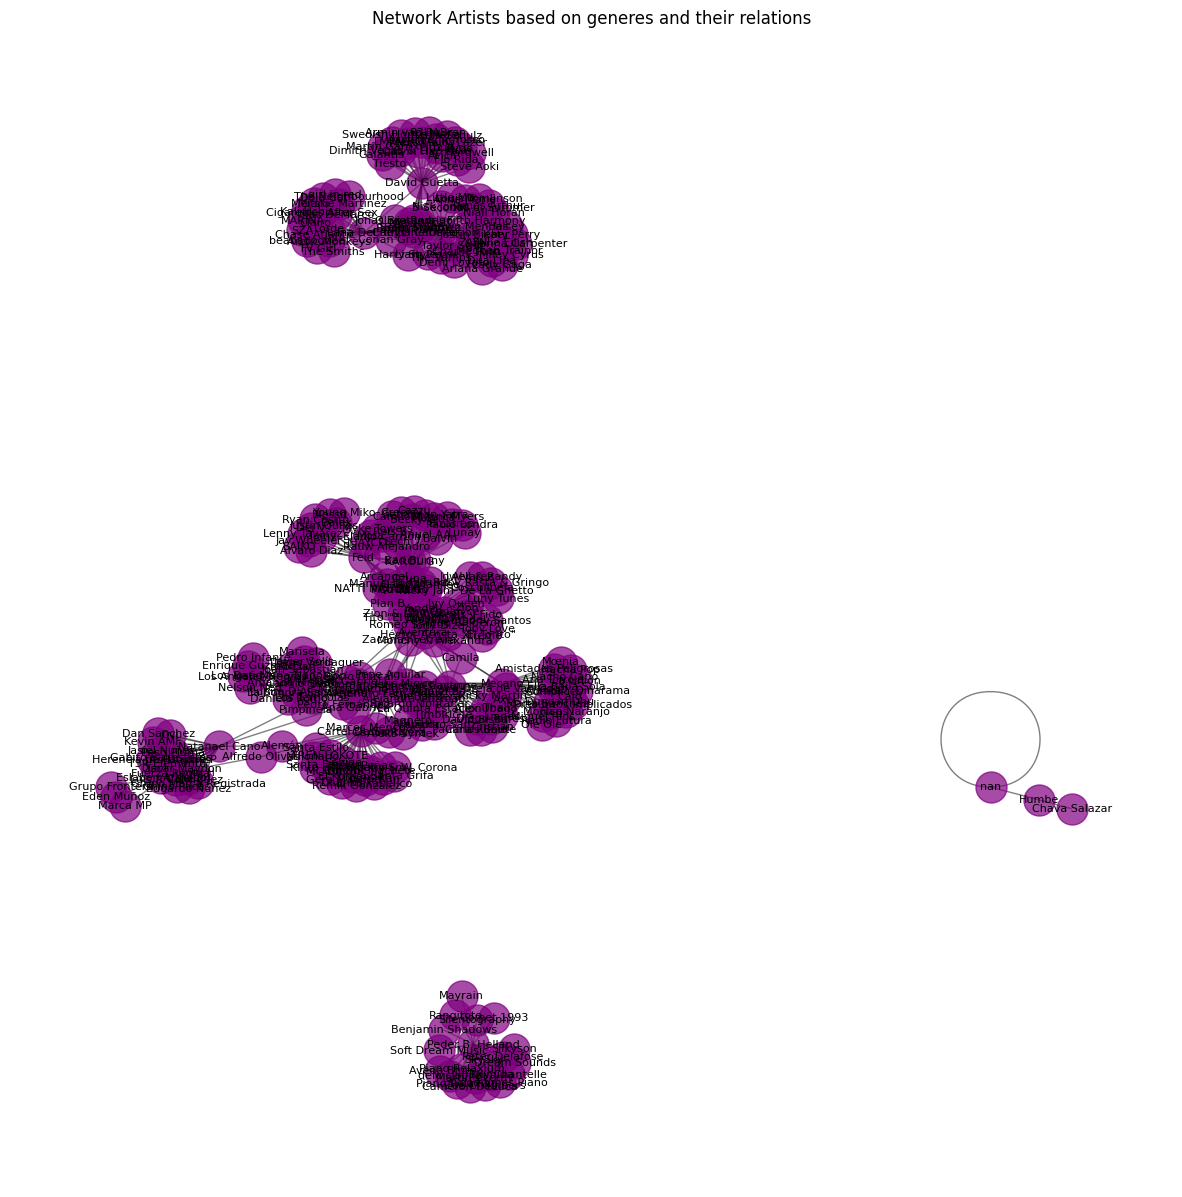

In [ ]:
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, seed=42)  # Posicionamiento de nodos

#nodos
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='purple', alpha=0.7)
#aristas
nx.draw_networkx_edges(G, pos, alpha=0.5)
#etiquetas
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title('Network Artists based on generes and their relations')
plt.axis('off')
plt.show()


### **Centrality Degree**

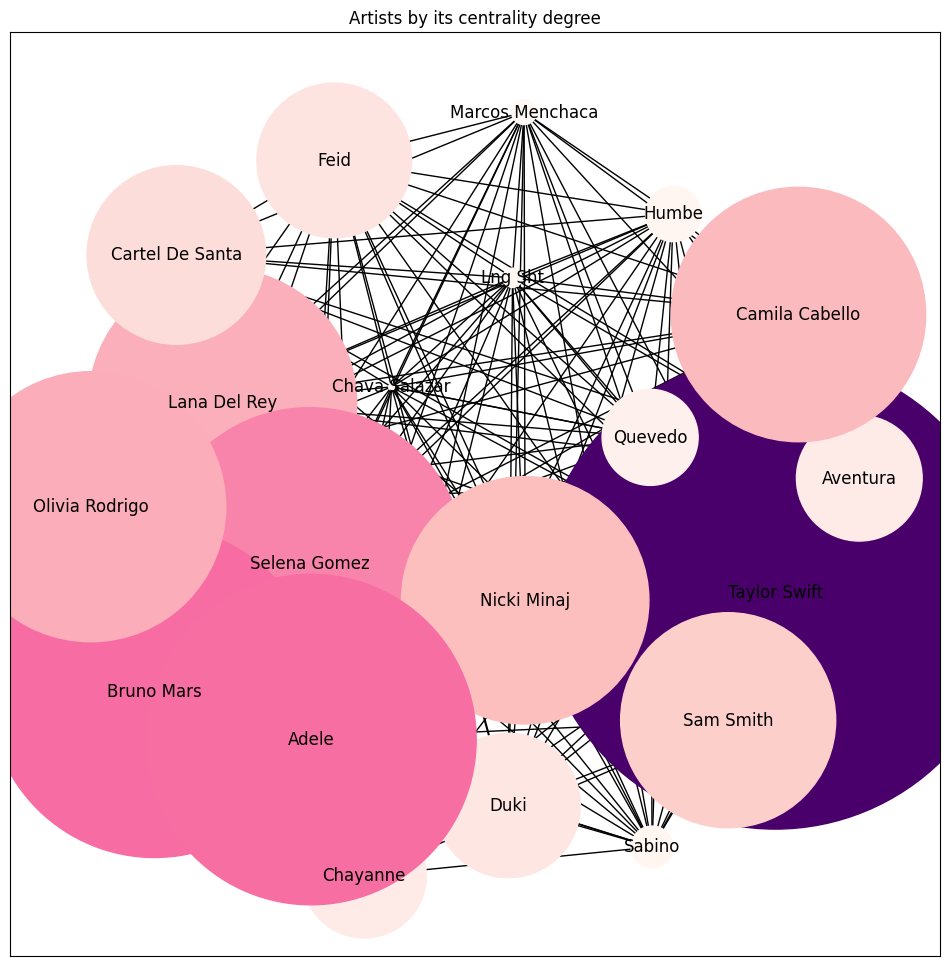

In [ ]:
#central degree based on followers
artists_df['degree_centrality'] = artists_df['followers']


G = nx.Graph()

# nodos con su centralidad como peso
for _, row in artists_df.iterrows():
    G.add_node(row['name'], weight=row['degree_centrality'])

for i in range(len(artists_df)):
    for j in range(i + 1, len(artists_df)):
        G.add_edge(artists_df.iloc[i]['name'], artists_df.iloc[j]['name'])


pos = nx.spring_layout(G)
weights = [G.nodes[n]['weight'] for n in G.nodes]

plt.figure(figsize=(12, 12))
nx.draw_networkx(G, pos, node_size=[w / 1000 for w in weights], with_labels=True, node_color=weights, cmap=plt.cm.RdPu)
plt.title('Artists by its centrality degree')
plt.show()


### **Clossness centrality**

<ipython-input-80-3fbac79461e5>:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.magma), label='Centralidad de Cercanía')


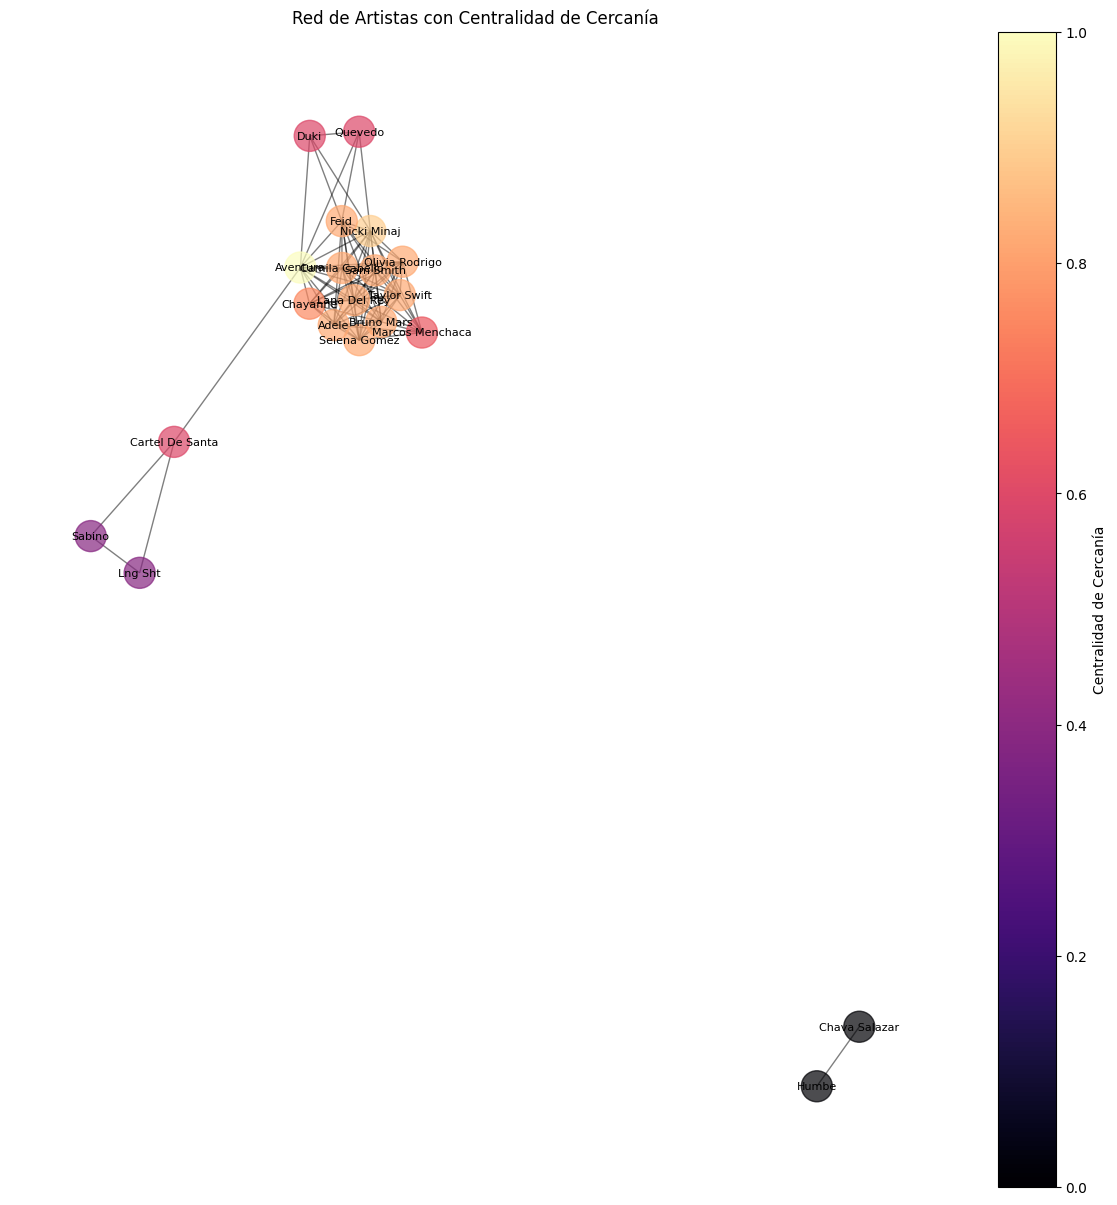

In [ ]:
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, seed=42)

#nodos con un color basado en la centralidad de cercanía
node_colors = [centrality_cercania[node] for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors, cmap=plt.cm.magma, alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title('Red de Artistas con Centralidad de Cercanía')
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.magma), label='Centralidad de Cercanía')
plt.axis('off')
plt.show()

### **Centrality**

<ipython-input-83-bcd161233123>:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.plasma), label='Intermediation Centrality ')


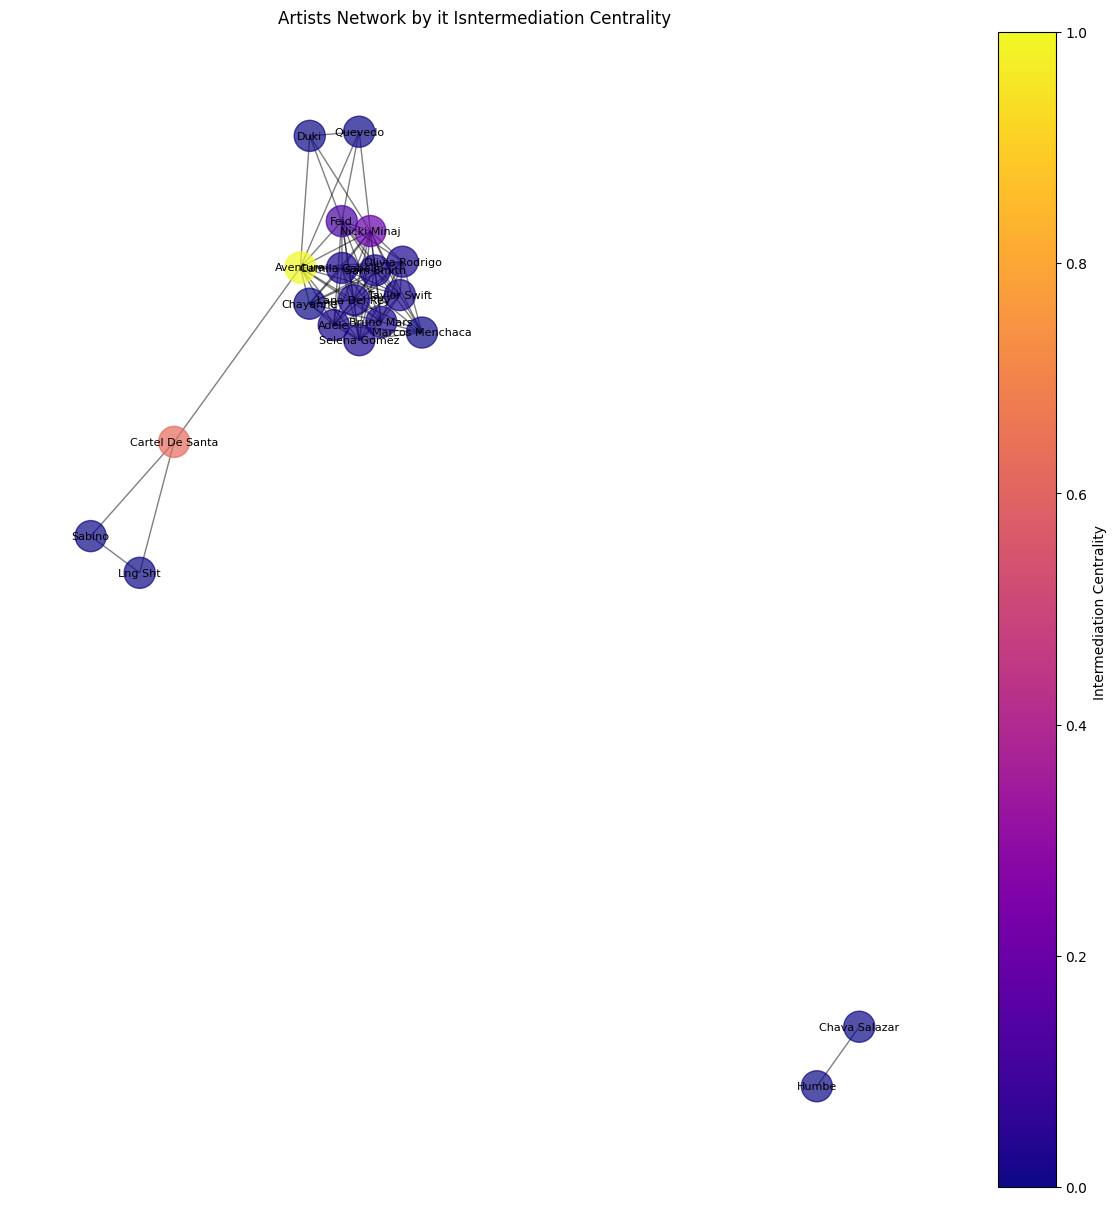

In [ ]:
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, seed=42)  # Posicionamiento de nodos


node_colors = [centrality_intermediacion[node] for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors, cmap=plt.cm.plasma, alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title('Artists Network by it Isntermediation Centrality')
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.plasma), label='Intermediation Centrality ')
plt.axis('off')
plt.show()

### **Generes**


In [ ]:
G = nx.Graph()

#nodos y aristas basadas en géneros compartidos
for _, row in artists_df.iterrows():
    G.add_node(row['name'], genres=row['genres'])
    genres = row['genres'].split(', ')
    for genre in genres:
        for neighbor in artists_df[artists_df['genres'].str.contains(genre)]['name']:
            if neighbor != row['name']:
                G.add_edge(row['name'], neighbor)

#diversidad de géneros para cada nodo
node_sizes = []
for node in G.nodes():
    genres = artists_df[artists_df['name'] == node]['genres'].values[0]
    num_genres = len(genres.split(', '))
    node_sizes.append(num_genres * 100)

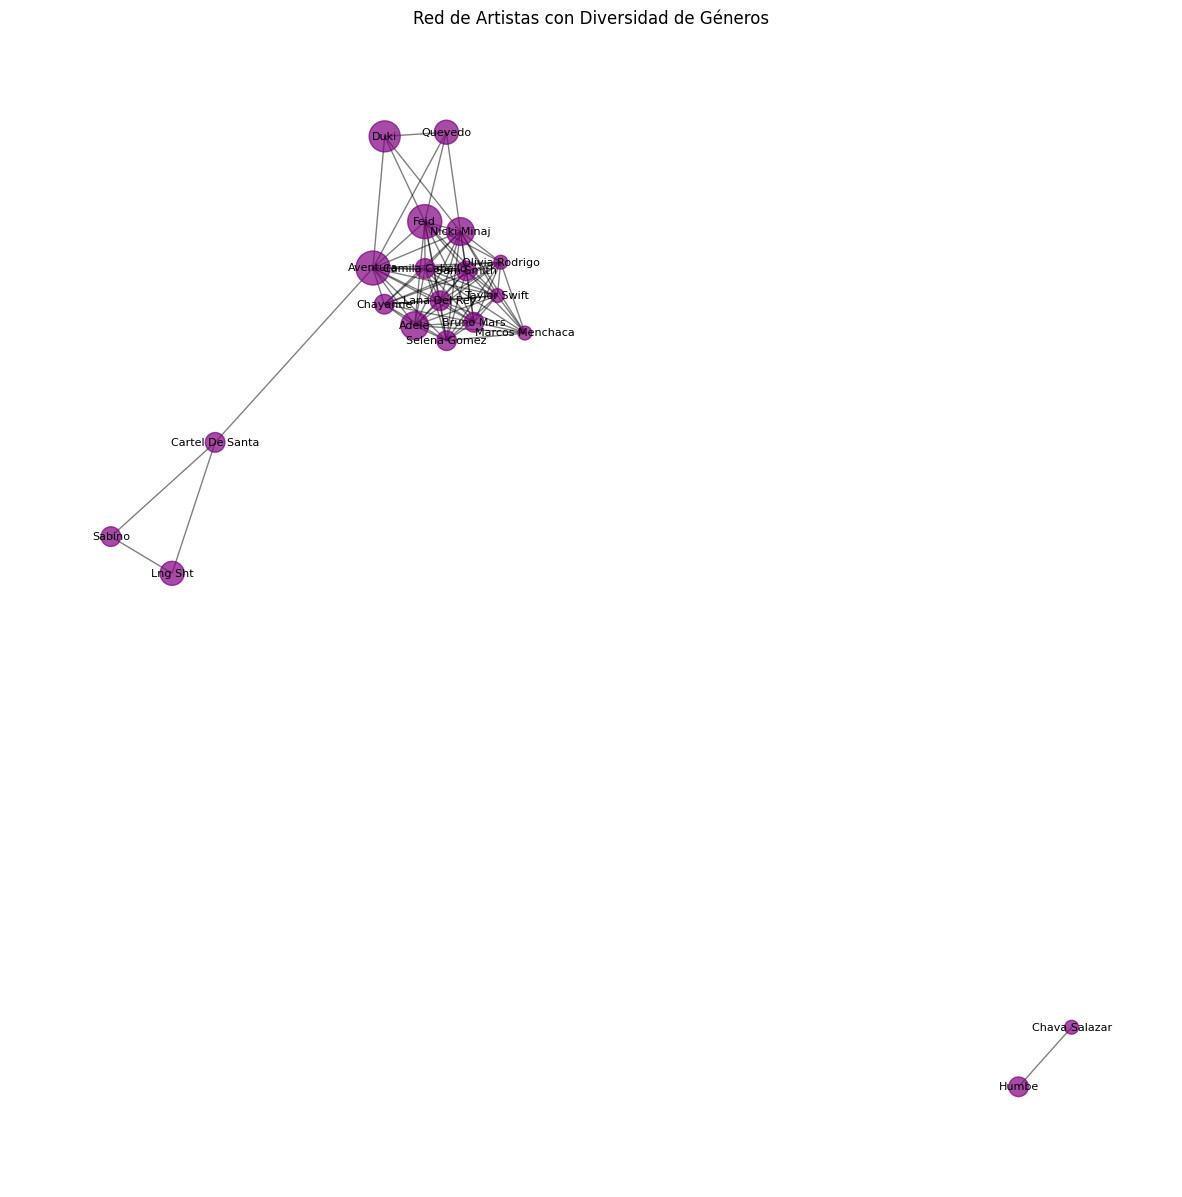

In [ ]:
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, seed=42)

#nodos deacuerdo al tamaño de su genero
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='purple', alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title('Red de Artistas con Diversidad de Géneros')
plt.axis('off')
plt.show()

### Projections

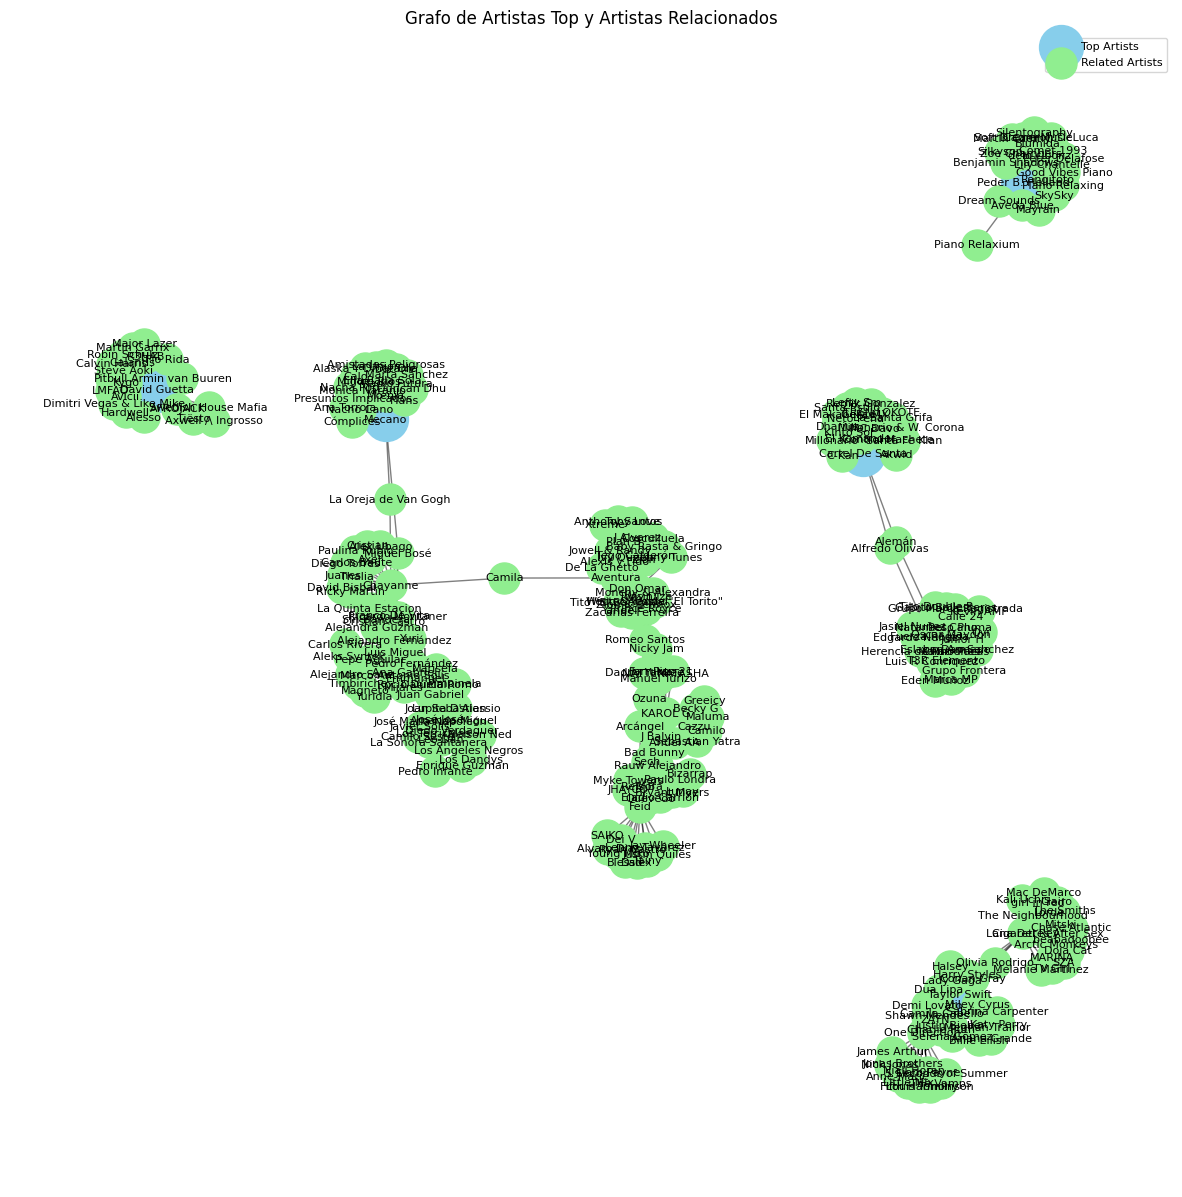

In [ ]:
import networkx as nx

G = nx.Graph()

# nodos de artistas top
for _, artist in top_artists_df.iterrows():
    G.add_node(artist['name'], type='top_artist')

# nodos y aristas de artistas relacionados
for _, row in related_artists_suggestions.iterrows():
    G.add_node(row['related_artist'], type='related_artist')
    G.add_edge(row['top_artist'], row['related_artist'], genres=row['genres'], popularity=row['popularity'])

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, seed=42)

#nodos
top_artist_nodes = [node for node, data in G.nodes(data=True) if data['type'] == 'top_artist']
related_artist_nodes = [node for node, data in G.nodes(data=True) if data['type'] == 'related_artist']

nx.draw_networkx_nodes(G, pos, nodelist=top_artist_nodes, node_color='skyblue', node_size=1000, label='Top Artists')
nx.draw_networkx_nodes(G, pos, nodelist=related_artist_nodes, node_color='lightgreen', node_size=500, label='Related Artists')

nx.draw_networkx_edges(G, pos, alpha=0.5)

nx.draw_networkx_labels(G, pos, font_size=8)

plt.legend(scatterpoints=1, loc='best', fontsize=8)

plt.title('Grafo de Artistas Top y Artistas Relacionados')
plt.axis('off')
plt.show()


In [ ]:
import pandas as pd

# Cargar datos y verificar columnas
top_tracks_df = pd.read_csv('top_tracks.csv')
related_artists_df = pd.read_csv('related_artists.csv')

print("Columnas de top_tracks_df:", top_tracks_df.columns)
print("Columnas de related_artists_df:", related_artists_df.columns)

# Si las columnas no son las esperadas, ajusta el código a los nombres correctos.


Columnas de top_tracks_df: Index(['name', 'artist', 'album', 'spotify_url', 'popularity'], dtype='object')
Columnas de related_artists_df: Index(['top_artist', 'related_artist', 'spotify_url', 'genres', 'popularity'], dtype='object')


## **Conlusions**

Network analysis in Spotify provides deep insights into the interconnections between artists, users and their musical tastes. This project was a good example of how network analysis techniques can be applied to real data to extract valuable information and generate useful insights.

- Project Summary:

Configuration and Authentication

Data Collection

Network Analysis

Visualization and Metrics


 These capabilities are essential to better understand and respond to user preferences and behaviors, applicable across diverse industries and use cases.


 PSD. as you can see, **Taylor Swift RULES :***



# References

https://developer.spotify.com/

https://developer.spotify.com/dashboard/6d84f6f8e84e46c59ed68344021e2ba9/settings

https://developer.spotify.com/documentation/web-api/reference/get-an-artist

https://developer.spotify.com/documentation/web-api/reference/get-an-artists-top-tracks

https://matplotlib.org/stable/users/explain/colors/colormaps.html